In [1]:
using LinearAlgebra
using Kronecker
using DataFrames
using CSV

In [2]:
include("../lib/constants.jl");
include("../lib/variables.jl");
include("../lib/maths.jl");
include("../lib/initialStates.jl");
include("../lib/hamiltonians.jl");

In [3]:
θ = π/2;

### Original Basis ###

In [4]:
function HS1D(n1, λ1, Ω1)
    spin = -sign(γ)*kronecker(σz, 𝕀(n1))
    rc = scale*kronecker(𝕀s, (Ω1/ωL)*(create(n1)*annihilate(n1)))
    int = (λ1/ωL)*kronecker((sin(θ)*σx + cos(θ)*σz), (create(n1) + annihilate(n1)))
    return spin + rc + int
end;

### New Basis

In [5]:
function HS1DT(n1, λ1, Ω1)
    spin = -sign(γ)*kronecker((-sin(θ)*σx + cos(θ)*σz), 𝕀(n1))
    rc = scale*kronecker(𝕀s, (Ω1/ωL)*(create(n1)*annihilate(n1)))
    int = (λ1/ωL)*kronecker(σz, (create(n1) + annihilate(n1)))
    return spin + rc + int
end;

In [6]:
function ρMFGS(H, T)
    proj = eigen(H).vectors # Projector onto the basis of H
    HTr = adjoint(proj)*H*proj # Transformed H
    stateTot = proj*gibbs(HTr, T)*adjoint(proj)
    return ptrace(stateTot, n1)
end;

In [7]:
sMFGS(H, T) = tr(ρMFGS(H, T)*σz);
sMFGST(H, T) = tr(ρMFGS(H, T)*(-sin(θ)*σx + cos(θ)*σz));

In [8]:
s1D = [realIfClose(sMFGS(HS1D(n1, λ1, Ω1), i)) for i in T];

In [9]:
s1DT = [realIfClose(sMFGST(HS1DT(n1, λ1, Ω1), i)) for i in T];

In [10]:
dfMFGS1D = DataFrame(hcat(T, s1D), :auto);
CSV.write("C://Users//crh222//QuantumSpinDynamics//data//rot_test_untransformed.csv",  dfMFGS1D, header = ["T", "sz"]);

In [11]:
dfMFGS1DT = DataFrame(hcat(T, s1DT), :auto);
CSV.write("C://Users//crh222//QuantumSpinDynamics//data//rot_test_transformed.csv",  dfMFGS1DT, header = ["T", "sz"]);

## Plot

In [1]:
import numpy as np
import numpy.random as rn
import scipy.stats as st
import scipy.fftpack as ft
import scipy.integrate as od
import scipy.signal as sig
import scipy.interpolate as intpl
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import tqdm as tqdm
import pickle
from scikits.odes.odeint import odeint

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"  #"Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
#rc('text', usetex=True)

In [2]:
import pandas as pd

In [3]:
data_untransformed = np.array(pd.read_csv(r'..//data//rot_test_untransformed.csv'))
data_transformed = np.array(pd.read_csv(r'..//data//rot_test_transformed.csv'))

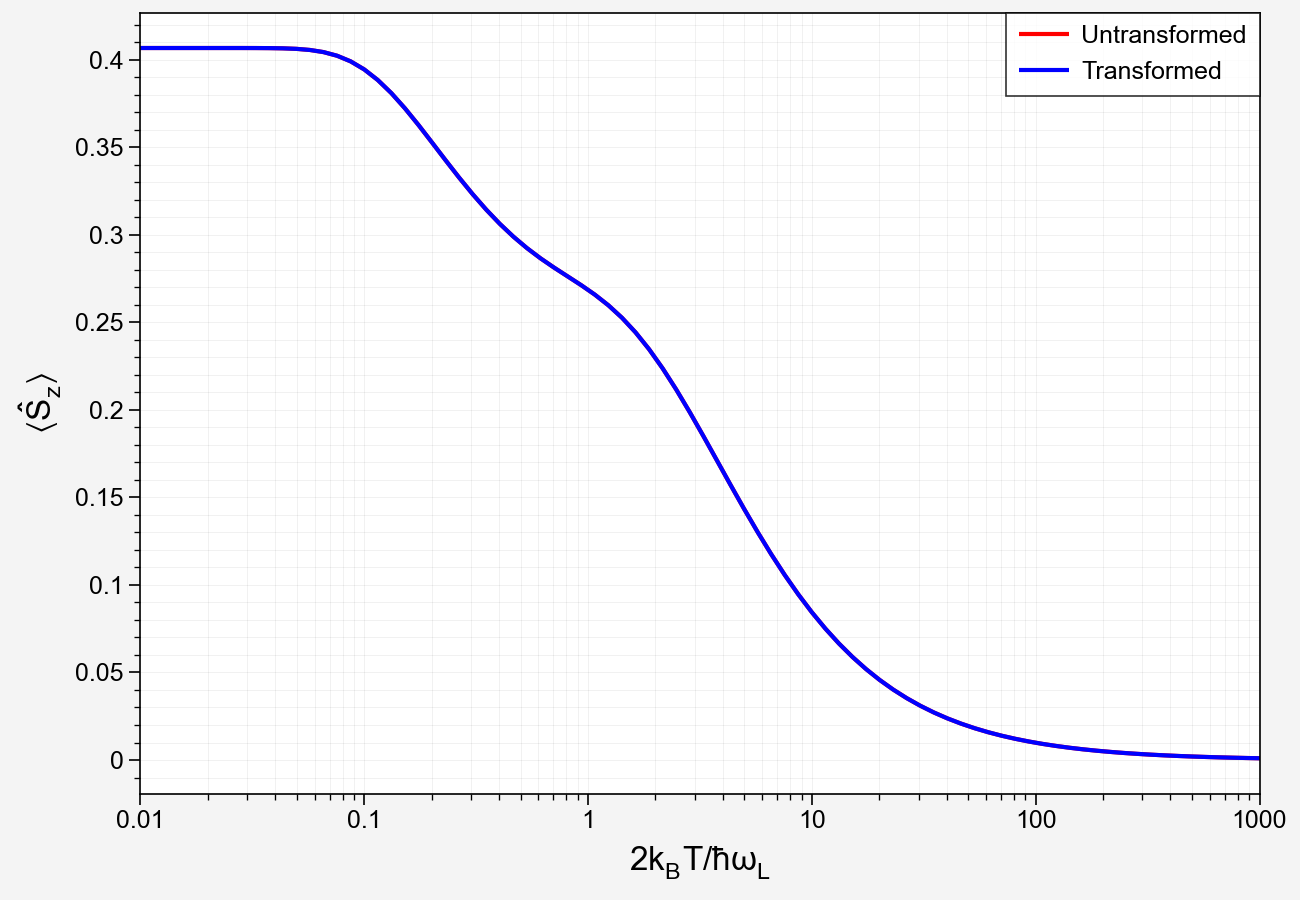

In [4]:
fig, ax = pplt.subplots(figsize=(6.5, 4.5))  #size in inches

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel("$2 k_B T/\hbar \omega_L$", fontsize=12)
ax.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax.set_xlim(0.01, 1000)
pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax.semilogx(data_untransformed[:,0], -data_untransformed[:,1], 'r-', label = "Untransformed")
ax.semilogx(data_transformed[:,0], -data_transformed[:,1], 'b-', label = "Transformed")

##### Plot ######

plt.legend(ncol=1)
plt.grid(which='both', lw='0.2')
# plt.title('Steady-State Magnetisations at Angle $\\theta$ from z-Axis (Prm. A)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//MFGS1D_theta.pdf", dpi=300)